# House Prices: Advanced Regression Techniques
[link]: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data "Link"
[kaggle_link_house_prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)  

train.csv: 1460x81  
test.csv: 1429x80
```
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale
```




In [1]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import sklearn.metrics
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

data = pd.read_csv('train.csv')
X = data.iloc[:,1:-1].copy()
#y = data.iloc[:,-1]
y =  data.pop('SalePrice').values
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


### 確認是否有缺失

In [3]:
#X.info()
x_null_count = X.isnull().sum(axis = 0)
columns_name = X.columns.values
columns_has_nan_name = columns_name[x_null_count > 0]

print('Has %d columns Nan'%len(columns_has_nan_name))
x_null_count[x_null_count>0]
#print(X[columns_has_nan_name].iloc[:,:5].head())
#print(X[columns_has_nan_name].iloc[:,5:10].head())
#print(X[columns_has_nan_name].iloc[:,10:15].head())
#print(X[columns_has_nan_name].iloc[:,15:].head())

Has 19 columns Nan


LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [4]:
class dataProcess:
    def __init__(self,aaa=0):
        self.options = {'aaa':aaa}
        self.caterogy_imputer_step = ('caterogy_imputer_step', SimpleImputer(strategy='constant',fill_value='MISSING')) 
        self.caterogy_encoder_step = ('caterogy_encoder_step', OneHotEncoder(sparse=False,handle_unknown='ignore')) 
        self.num_imputer_step = ('num_imputer_step', SimpleImputer(strategy='median'))
        self.num_scaler_step = ('num_scaler_step', StandardScaler())
        self.something = {
            'caterogy_pipe': Pipeline([self.caterogy_imputer_step, self.caterogy_encoder_step]),
            'num_pipe': Pipeline([self.num_imputer_step, self.num_scaler_step])
        }
    def fit(self, datax, datay=None):
        # X is pandas type
        kinds = np.array([dt.kind for dt in datax.dtypes])
        is_num = kinds != 'O'
        numeric_column_name = datax.columns.values[is_num]
        category_column_name = datax.columns.values[~is_num]
        self.ct_transformer = [('caterogy_transformer',self.something['caterogy_pipe'], category_column_name),('num_transformer',self.something['num_pipe'],numeric_column_name)]
        self.ct = ColumnTransformer(transformers=self.ct_transformer)        
    def transform(self, datax, datay=None):
        return self.ct.transform(datax)
    def fit_transform(self, datax, datay=None):
        self.fit(datax)
        return self.ct.fit_transform(datax)
    def set_params(self,**params):
        for p in params:
            if p in self.options:
                self.options[p] = params[p]
            else:
                s = p.split("__",1)
                hyperparameters = {}
                hyperparameters[s[1]] = params[p]
                self.something[s[0]].set_params(**hyperparameters)              
    def get_params(self,deep=True):
        return self.options
    def __repr__(self):
        msg="\n"
        msg += str(self.something['caterogy_pipe'].named_steps['caterogy_imputer_step'])
        msg += "\n"
        msg += str(self.something['caterogy_pipe'].named_steps['caterogy_encoder_step'])
        msg += "\n"
        msg += str(self.something['num_pipe'].named_steps['num_imputer_step'])
        msg += "\n"
        msg += str(self.something['num_pipe'].named_steps['num_scaler_step'])
        return msg

#param_grid = {
#    'dataProcess__caterogy_pipe__caterogy_imputer_step__fill_value': ['AAA','BBB'],
#    'dataProcess__num_pipe__num_imputer_step__strategy': ['median','mean'],
#    'SVC__kernel': ['linear','poly'],
#    'SVC__C': [0.01,0.1,1,10,100,1000],
#}


6736.913071554303


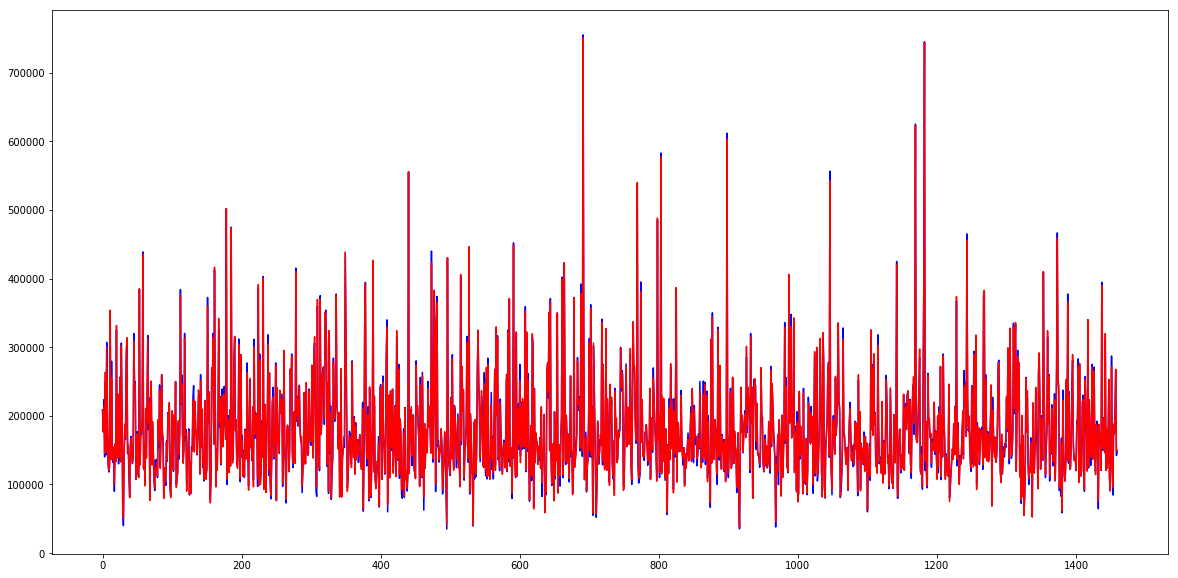

In [8]:
from sklearn.linear_model import Ridge 
from xgboost import XGBClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error

# loss : {‘ls’, ‘lad’, ‘huber’, ‘quantile’}
ml_pipe = Pipeline([('dataProcess',dataProcess()), ('GradientBoostingRegressor',  GradientBoostingRegressor(n_estimators=500,criterion='friedman_mse',  loss='ls',learning_rate=0.1,max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2))])

#criterion: mse,mae
#ml_pipe = Pipeline([('dataProcess',dataProcess()), ('RandomForestRegressor', RandomForestRegressor(n_estimators=500,criterion='mse', max_depth=10, max_features='auto', min_samples_leaf=1, min_samples_split=2))])

#ml_pipe = Pipeline([('dataProcess',dataProcess()), ('ridge', Ridge())])
#ml_pipe = Pipeline([('dataProcess',dataProcess()), ('svr', SVR(kernel='poly', C=1,degree=3, gamma=1))])
# 1) call dataProcess fit_transform() --> Ridge()
ml_pipe.fit(X,y)
prediction = ml_pipe.predict(X)
print(np.sqrt(mean_squared_error(y_pred=prediction,y_true=y)))

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
x = np.arange(len(y))
plt.plot(x,y,c='b')
plt.plot(x,prediction,c='r')
plt.show()

### K Fold

In [9]:
#l_pipe = Pipeline([('dataProcess',dataProcess()), ('ridge', Ridge())])
#l_pipe = Pipeline([('dataProcess',dataProcess()), ('svr', SVR(kernel='poly', C=1,degree=3, gamma=1))])
kf = KFold(n_splits=5, shuffle=True, random_state=123)
rms_kfold = []
for train_index, validation_index in kf.split(X):
    # X is pandas type
    X_train, X_validation =  X.iloc[train_index],  X.iloc[validation_index]
    # y is ndarray type
    y_train, y_validation = y[train_index], y[validation_index]
    ml_pipe.fit(X_train, y_train)
    prediction = ml_pipe.predict(X_validation)
    rms_kfold.append(np.sqrt(mean_squared_error(y_pred=prediction,y_true=y_validation)))

np.mean(rms_kfold)

27005.6431170045

### Grid Search

In [7]:
ml_pipe = Pipeline([('dataProcess',dataProcess()), ('ridge', Ridge())])
param_grid = {
    'dataProcess__num_pipe__num_imputer_step__strategy': ['median','mean'],
    'ridge__alpha': [.001, 0.1, 1.0, 5, 10, 50, 100, 1000],
    }
kf = KFold(n_splits=5, shuffle=True, random_state=123)
# estimator need provide a score function
gsearch = GridSearchCV(estimator=ml_pipe, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error')
gsearch.fit(X, y)
gsearch.best_params_, gsearch.best_score_

({'dataProcess__num_pipe__num_imputer_step__strategy': 'median',
  'ridge__alpha': 10},
 -1142405513.1486788)

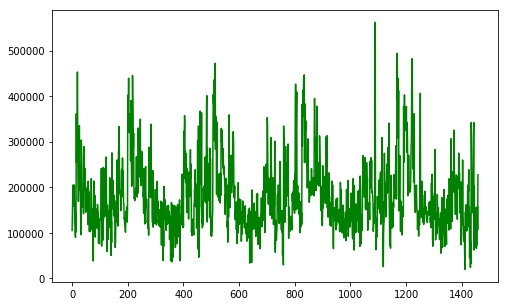

In [12]:
data2 = pd.read_csv('./test.csv')
data2.head()

X2 = data2.iloc[:,1:]
#prediction = best_ml_pipe.predict(X2)
ml_pipe = Pipeline([('dataProcess',dataProcess()), ('ridge', Ridge(alpha=10))])
ml_pipe.fit(X,y)

prediction = ml_pipe.predict(X2)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,5))

x = np.arange(len(X2))
plt.plot(x,prediction,c='g')
plt.show()
# Output Result
result_pd = pd.DataFrame(prediction,columns=['SalePrice'])
result_pd.index += 1461
result_pd.head()
result_pd.to_csv('result.csv',index=True, index_label='Id')

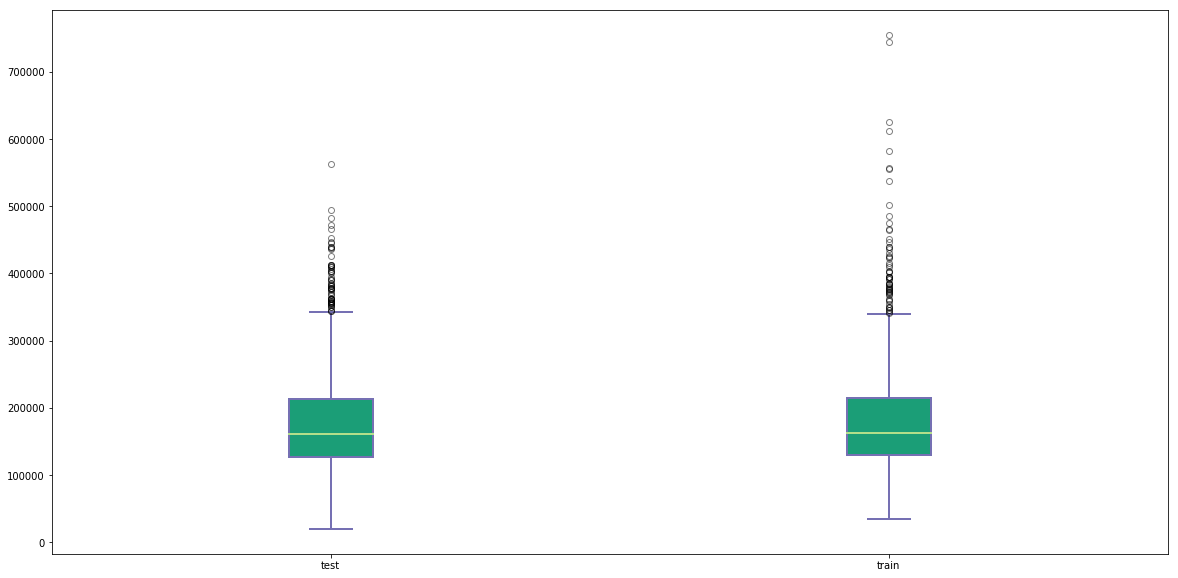

In [13]:
plt.figure(figsize=(20,10))
bp = plt.boxplot([prediction,y],patch_artist=True,  labels=('test','train'))
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )
# 垂直線部分
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)
# Q3,Q1上下四分位數    
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## 畫出中位數
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)   
## change the style of fliers and their fill
# outlier 離群值
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

plt.show()

In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
from subprocess import check_output

color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 

print(check_output(["ls", "./"]).decode("utf8"))

data_description.txt
house_prices.ipynb
result.csv
sample_submission.csv
test.csv
train.csv



In [20]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [21]:
train_ID = train['Id']
test_ID = test['Id']
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


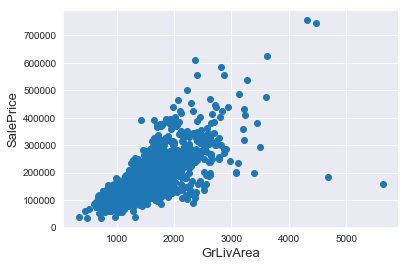

In [22]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

### 可以看出GrLivArea大於4000但SalePrice卻不高於300000的是outlier

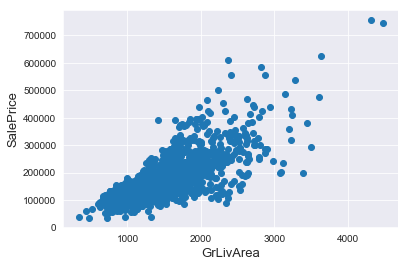

In [23]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

### SalePrice需要轉成常態 y_train  


 mu = 180932.92 and sigma = 79467.79



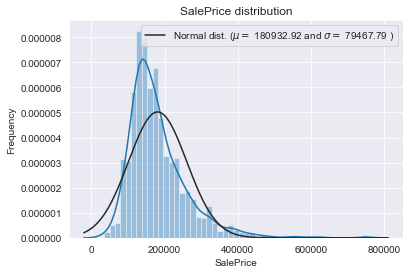

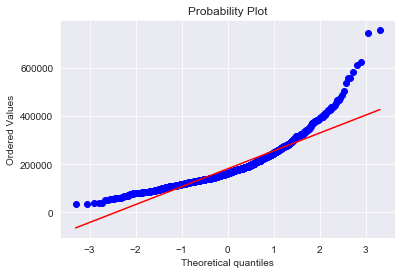

In [33]:
from scipy.stats import norm, skew #for some statistics
from scipy import stats
sns.distplot(train['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

### The target variable is right skewed.
右偏函數使用log()  


 mu = 0.82 and sigma = 0.00



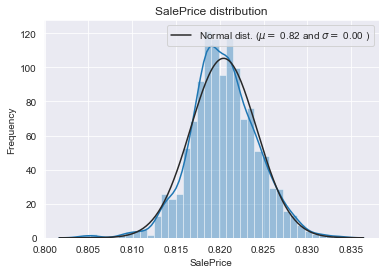

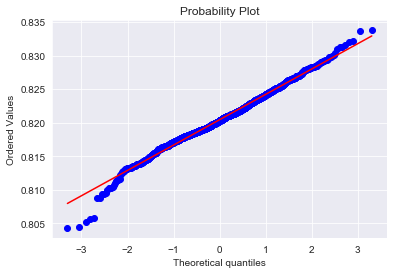

In [37]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])
#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

### Features engineering
特徵工程  

In [39]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

- missing value  
遺失值  

,Missing Ratio
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680
LotFrontage,16.661
GarageQual,5.451
GarageCond,5.451
GarageFinish,5.451
GarageYrBlt,5.451


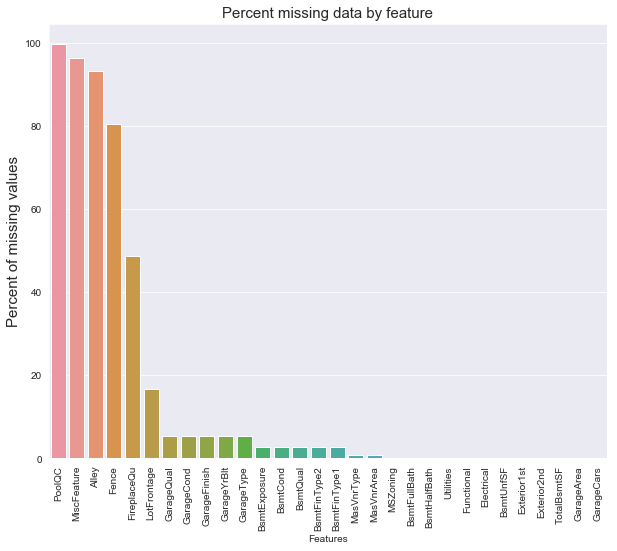

In [50]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})

f, ax = plt.subplots(figsize=(10, 8))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=10)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head(20)

### Data Correlation
Correlation map 

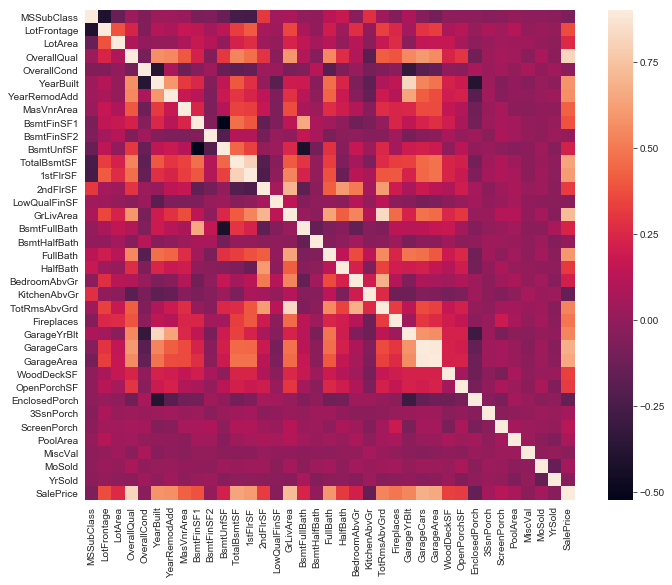

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,0.823
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,0.821
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,0.823
3,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,0.819
4,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,0.824


In [49]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)
plt.show()
train.head()

- PoolQC :  
data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.
- MiscFeature :  
data description says NA means "no misc feature"  
- Alley :  
data description says NA means "no alley access"  
- Fence :  
data description says NA means "no fence"
- FireplaceQu :  
data description says NA means "no fireplace"
- GarageType, GarageFinish, GarageQual and GarageCond :  
Replacing missing data with None

- GarageYrBlt, GarageArea and GarageCars :  
Replacing missing data with 0 (Since No garage = no cars in such garage.)

- BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath :  
missing values are likely zero for having no basement

- BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 :  
For all these categorical basement-related features, NaN means that there is no basement.

- MasVnrArea and MasVnrType :  
NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.  

- Functional :  
data description says NA means typical  
- MSSubClass :  
Na most likely means No building class. We can replace missing values with None  

In [107]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)  
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

all_data["Functional"] = all_data["Functional"].fillna("Typ")

all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

LotFrontage :  
Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.  

也可以用LotArea的面積大小分10類, 分別對這10組中缺失值個別用中位數補值  


In [93]:
#以Neighborhood分別看不同Neighborhood下的LotFrontage值的mean, median, count
#print(all_data.groupby(['Neighborhood'])[['LotFrontage']].agg(['mean','median','count']))

#按LotArea的面積大小分10類, 印出這10類下的LotFrontage平均值
all_data["LotAreaCut"] = pd.qcut(all_data.LotArea,10)
print(all_data.groupby(['LotAreaCut'])[['LotFrontage']].agg(['mean','median','count']))

#用LotAreaCut分出的10類個別的中值x.median填給各自類別中的Nan, 用x.fillna()對缺失值填值
all_data["LotFrontage"] = all_data.groupby("LotAreaCut")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

#去掉剛剛做出來的LotAreaCut
all_data.drop(['LotAreaCut'], axis=1, inplace=True)


                    LotFrontage             
                           mean median count
LotAreaCut                                  
(1299.999, 4921.8]       35.497 34.000   292
(4921.8, 7007.2]         55.164 52.000   292
(7007.2, 7949.0]         62.821 62.000   291
(7949.0, 8740.4]         66.846 65.000   292
(8740.4, 9452.0]         69.966 70.000   292
(9452.0, 10148.8]        74.113 75.000   291
(10148.8, 11000.0]       73.823 75.000   293
(11000.0, 12196.8]       83.069 82.000   290
(12196.8, 14285.8]       84.979 85.000   292
(14285.8, 215245.0]      91.969 90.000   292


- MSZoning (The general zoning classification) :   
'RL' is by far the most common value. So we can fill in missing values with 'RL'

- Electrical :  
It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.  

- KitchenQual:  
Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.

- Exterior1st and Exterior2nd :  
Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string

- SaleType :  
Fill in again with most frequent which is "WD"

In [106]:
#表示最多是RL
print(all_data['MSZoning'].mode()[0])
#填上最多數的
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

print(all_data['Electrical'].mode()[0])
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

RL
SBrkr


###  Utilities  
For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.

In [102]:
all_data = all_data.drop(['Utilities'], axis=1)

### Check Missing Value again

In [109]:

all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


# 有些東西雖然是數值但實際是類別  
Transforming some numerical variables that are really categorical

In [114]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

### Adding one more important feature  
Since area related features are very important to determine house prices, we add one more feature which is the total area of basement, first and second floor areas of each house

In [115]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

### Skewed features  
用skew算出偏態

In [116]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.940
PoolArea,17.689
LotArea,13.109
LowQualFinSF,12.085
3SsnPorch,11.372
LandSlope,4.973
KitchenAbvGr,4.301
BsmtFinSF2,4.145
EnclosedPorch,4.002
ScreenPorch,3.945


#### Box Cox Transformation of (highly) skewed features
We use the scipy function boxcox1p which computes the Box-Cox transformation of  1+x .
Note that setting  λ=0  is equivalent to log1p used above for the target variable.  

將偏態係數絕對值大於0.75的做修正  
lam取0.15. 


In [119]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    

There are 59 skewed numerical features to Box Cox transform


### get_dummies
對所有categorical類別做oneHotEncoder  

In [120]:
all_data = pd.get_dummies(all_data)  
print(all_data.shape)

(2917, 220)


### 轉回資料

In [136]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [138]:
from sklearn import metrics

#model = Ridge()
X = train.iloc[:,:]
#model.fit(X,y_train)
#predicted = model.predict(X)
#mse = metrics.mean_squared_error(predicted, y_train)
#print(mse)

y = y_train

kf = KFold(n_splits=5, shuffle=True, random_state=123)
rms_kfold = []
for train_index, validation_index in kf.split(X):
    # X is pandas type
    X_train, X_validation =  X.iloc[train_index],  X.iloc[validation_index]
    # y is ndarray type
    y_train, y_validation = y[train_index], y[validation_index]
    model = Ridge()
    model.fit(X,y)
    prediction = model.predict(X_validation)
    prediction_exp = [np.exp(i) for i in prediction]
    rms_kfold.append(np.sqrt(mean_squared_error(y_pred=prediction,y_true=y_validation)))

np.mean(rms_kfold)


IndexError: index 1168 is out of bounds for axis 0 with size 1167

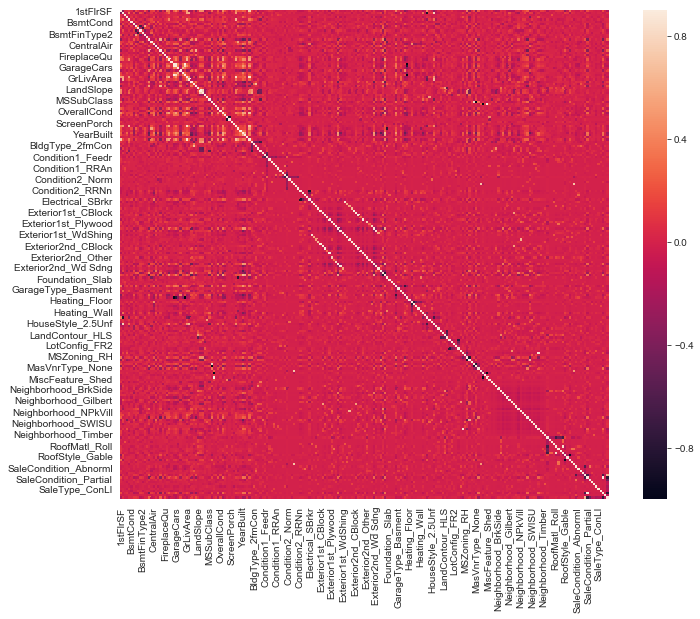

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,3.093,3.092,0.000,0.572,1.001,1.122,1.001,3.032,0.000,0.834,...,0,0,0,0,0,0,0,0,0,1
1,3.216,0.000,0.000,0.572,1.001,1.122,0.572,3.135,0.000,0.000,...,0,0,0,0,0,0,0,0,0,1
2,3.116,3.097,0.000,0.572,1.001,1.122,0.834,2.912,0.000,0.834,...,0,0,0,0,0,0,0,0,0,1
3,3.130,3.054,0.000,0.572,1.001,0.572,1.001,2.644,0.000,0.000,...,0,0,0,0,0,0,0,0,0,1
4,3.185,3.159,0.000,0.572,1.122,1.122,0.000,3.008,0.000,0.834,...,0,0,0,0,0,0,0,0,0,1
